<a href="https://colab.research.google.com/github/jsotoacebal/Analisis_predictivo/blob/main/Analisis_predictivo__TP2__Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## EDA

### Importación de datos

In [2]:
import json
from google.colab import drive

!mkdir ~/.kaggle
!touch ~/.kaggle/kaggle.json
drive.mount('/content/drive', force_remount=True)


Mounted at /content/drive


In [3]:
with open("/content/drive/MyDrive/1Q2023/Kaggle/kaggle.json", 'r') as f:
    api_token= json.load(f)

with open('/root/.kaggle/kaggle.json', 'w') as file:
    json.dump(api_token, file)

!chmod 600 ~/.kaggle/kaggle.json

!kaggle competitions download -c analisis-predictivo-2023q1


  0% 0.00/3.83M [00:00<?, ?B/s]
100% 3.83M/3.83M [00:00<00:00, 236MB/s]


In [4]:
import zipfile
import os

os.listdir()

for file in os.listdir():
    if file.endswith('.zip'):
      zip_ref = zipfile.ZipFile(file, 'r')
      zip_ref.extractall()
      zip_ref.close()

In [5]:
import pandas as pd
#Cargar datos
df = pd.read_csv('base_val.csv')

print(df.head())

                   id           source  \
0  568520730880917893  previous scrape   
1  568523400177884625  previous scrape   
2  568561397403760678      city scrape   
3  568683128219348239  previous scrape   
4  570029413851129083      city scrape   

                                               name  \
0       Apartment - 2 bedrooms - hot tub + 1 studio   
1   Ruim appartement met dakterras naast Vondelpark   
2  Luxurious/modern 2-bedroom apartment with garden   
3    Unieke woonark op rustige plek in hartje Adam!   
4  Stijlvol ingericht appartement - gratis parkeren   

                                         description  \
0  This is our newly renovated home in Amsterdam ...   
1  Lovely 91sqm apt with 40 sqm roof terrace next...   
2  Experience ultimate relaxation in this luxury ...   
3  Welkom op onze woonark! <br />Het rustigste pl...   
4  Appartement in Amsterdam West - Bos en Lommer....   

                               neighborhood_overview    host_id host_name  \
0 

### Exploración + Transformación

In [ ]:
print(df)

                      id           source  \
0                 528022      city scrape   
1                   2818      city scrape   
2                  20168  previous scrape   
3                  27886      city scrape   
4                  28871      city scrape   
...                  ...              ...   
4923  567407960487712181      city scrape   
4924  567829002669570759      city scrape   
4925  567927199868989828      city scrape   
4926  567958632398468204      city scrape   
4927  568514877303578111      city scrape   

                                                   name  \
0                                        Somewhere Else   
1             Quiet Garden View Room & Super Fast Wi-Fi   
2          Studio with private bathroom in the centre 1   
3     Romantic, stylish B&B houseboat in canal district   
4                               Comfortable double room   
...                                                 ...   
4923  Charming apartment in Oud-West, next to 

In [ ]:
print('Cantidad de Filas y columnas:', df.shape)

Cantidad de Filas y columnas: (4928, 68)


In [ ]:
df.dtypes

id                                                int64
source                                           object
name                                             object
description                                      object
neighborhood_overview                            object
                                                 ...   
calculated_host_listings_count                    int64
calculated_host_listings_count_entire_homes       int64
calculated_host_listings_count_private_rooms      int64
calculated_host_listings_count_shared_rooms       int64
reviews_per_month                               float64
Length: 68, dtype: object

In [ ]:
#Cantidad de datos duplicados
df.duplicated().sum()

0

No hay datos duplicados

In [ ]:
df.describe()

,id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,bedrooms,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,4.928000e+03,4.928000e+03,4928.000000,4928.000000,0.0,4928.000000,4928.000000,4928.000000,0.0,4688.000000,...,4924.000000,4924.000000,4924.000000,4924.000000,4924.000000,4928.000000,4928.000000,4928.000000,4928.000000,4928.000000
mean,6.294489e+15,8.186850e+07,2.508929,4.768872,NaN,52.367291,4.890984,2.915381,NaN,1.569966,...,4.757839,4.879411,4.888109,4.788587,4.650321,1.919846,0.953734,0.847808,0.052963,1.159996
std,5.873144e+16,1.114891e+08,10.565612,28.580679,NaN,0.016869,0.035833,1.418921,NaN,0.895077,...,0.292974,0.206738,0.216055,0.225730,0.268705,2.664493,1.379593,2.154187,0.507139,2.504318
min,2.818000e+03,3.159000e+03,1.000000,1.000000,NaN,52.290340,4.755710,0.000000,NaN,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.010000
25%,1.135244e+07,8.692070e+06,1.000000,1.000000,NaN,52.356657,4.868110,2.000000,NaN,1.000000,...,4.660000,4.840000,4.860000,4.680000,4.530000,1.000000,0.000000,0.000000,0.000000,0.250000
50%,2.437740e+07,2.735878e+07,1.000000,1.000000,NaN,52.366640,4.888395,2.000000,NaN,1.000000,...,4.840000,4.940000,4.960000,4.840000,4.690000,1.000000,1.000000,0.000000,0.000000,0.510000
75%,4.038502e+07,1.056092e+08,2.000000,3.000000,NaN,52.376990,4.908610,4.000000,NaN,2.000000,...,4.960000,5.000000,5.000000,4.960000,4.810000,1.000000,1.000000,1.000000,0.000000,1.240000
max,5.685149e+17,4.865512e+08,363.000000,673.000000,NaN,52.425120,5.026430,16.000000,NaN,10.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,22.000000,14.000000,20.000000,8.000000,106.740000


In [ ]:
df[['first_review','last_review']][(df['last_review']!=0) & (df['last_review'] < df['first_review'])]

,first_review,last_review


No hay fecha de review anterior a la primera

In [ ]:
df_num = df.select_dtypes(include=['int', 'float'])
df_obj = df.select_dtypes(include=['object'])
print(df_obj.head())
print(df_num.head())

            source                                               name  \
0      city scrape                                     Somewhere Else   
1      city scrape          Quiet Garden View Room & Super Fast Wi-Fi   
2  previous scrape       Studio with private bathroom in the centre 1   
3      city scrape  Romantic, stylish B&B houseboat in canal district   
4      city scrape                            Comfortable double room   

                                         description  \
0  Highlights<br />*Located only 5 minutes from C...   
1  Quiet Garden View Room & Super Fast Wi-Fi<br /...   
2  17th century Dutch townhouse in the heart of t...   
3  Stylish and romantic houseboat on fantastic hi...   
4  <b>The space</b><br />In a monumental house ri...   

                               neighborhood_overview  host_name  host_since  \
0                                                NaN        Els  2012-06-10   
1  Indische Buurt ("Indies Neighborhood") is a ne...     Daniel  2

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4928 entries, 0 to 4927
Data columns (total 68 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            4928 non-null   int64  
 1   source                                        4928 non-null   object 
 2   name                                          4928 non-null   object 
 3   description                                   4925 non-null   object 
 4   neighborhood_overview                         3580 non-null   object 
 5   host_id                                       4928 non-null   int64  
 6   host_name                                     4928 non-null   object 
 7   host_since                                    4928 non-null   object 
 8   host_location                                 4507 non-null   object 
 9   host_about                                    3182 non-null   o

In [ ]:
categorical_columns_ = [c for c in df.columns if df[c].dtype == 'O']
for c in categorical_columns_:
    print(c)
    print(df[c].value_counts(normalize=True, dropna=False), "\n")

source
city scrape        0.617086
previous scrape    0.382914
Name: source, dtype: float64 

name
Residences | 2-Bedrooms | Serviced Apartment          0.001420
Spacious & convenient stay in Amsterdam South         0.001015
Lovely apartment in Amsterdam                         0.000609
Residences | 1-Bedrooms | Serviced Apartment          0.000609
Residences | 3-Bedrooms | Serviced Apartment          0.000406
                                                        ...   
Private studio apartment in Amsterdam center          0.000203
Historical apartment @ City centre+rooftop terrace    0.000203
Complete apartment in a quiet street in De Pijp       0.000203
Forecastle of 1925 ship!                              0.000203
Gezellige familiewoning op loopafstand van metro      0.000203
Name: name, Length: 4896, dtype: float64 

description
Museums, thrift shopping, and stroopwafels — your Amsterdam experience begins at Park House. Each room includes a coffee maker, space to work, and an HDM

Missing y NA

Exploración de columnas con valores faltantes

In [ ]:
# Calcular la cantidad de valores faltantes por columna
missing_values = df.isna().sum()

# Seleccionar las columnas con más de 500 valores faltantes
miss_cols = list(missing_values[missing_values > 500].index)

# Imprimir las columnas
print(miss_cols)

['neighborhood_overview', 'host_about', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_neighbourhood', 'neighbourhood', 'neighbourhood_group_cleansed', 'bathrooms', 'calendar_updated']


In [ ]:
columns_with_missing = df.columns[df.isnull().any()]

# Count missing values in each column
missing_value_counts = df[columns_with_missing].isnull().sum()

# Sort the columns by count of missing values in descending order
sorted_columns_desc = missing_value_counts.sort_values(ascending=False)

# Display the sorted columns and their counts
print("Columns with missing values (sorted in descending order):")
print(sorted_columns_desc)

Columns with missing values (sorted in descending order):
bathrooms                       4928
calendar_updated                4928
neighbourhood_group_cleansed    4928
host_neighbourhood              2124
host_about                      1746
host_response_time              1662
host_response_rate              1662
neighbourhood                   1348
neighborhood_overview           1348
host_acceptance_rate             776
host_location                    421
bedrooms                         240
license                           98
beds                              70
bathrooms_text                     9
review_scores_accuracy             4
review_scores_cleanliness          4
review_scores_checkin              4
review_scores_communication        4
review_scores_location             4
review_scores_value                4
description                        3
host_is_superhost                  1
dtype: int64


Modificación de variables

In [6]:
import pandas as pd
# Remove $ and , from price variable
df.price = df.price.str.replace('$', '')
df.price = df.price.str.replace(',', '')
df.price = df.price.astype(float)

# Remove % from host_response_rate variable
df.host_response_rate = df.host_response_rate.str.replace('%', '')
df.host_response_rate = df.host_response_rate.astype(float)

# Make host_response_rate numeric
df.host_response_rate = pd.to_numeric(df.host_response_rate, errors='coerce')

# Remove % from host_acceptance_rate variable
df.host_acceptance_rate = df.host_acceptance_rate.str.replace('%', '')
df.host_acceptance_rate = df.host_acceptance_rate.astype(float)

# Make host_acceptance_rate numeric
df.host_acceptance_rate = pd.to_numeric(df.host_acceptance_rate, errors='coerce')

#print(df)

<ipython-input-6-c6f444f157e7>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df.price = df.price.str.replace('$', '')


Imputación de NA

In [7]:
import pandas as pd
import numpy as np


df_num = df.select_dtypes(include=['float64', 'int64'])
numerical_columns = df.select_dtypes(include=[np.number])

# Columnas con missing
numerical_columns_with_missing = numerical_columns.columns[numerical_columns.isnull().any()].tolist()

mean_values = df_num[numerical_columns_with_missing].mean()

# Imputación de missint
df[numerical_columns_with_missing] = df[numerical_columns_with_missing].fillna(mean_values)

# Output the DataFrame with imputed values and new binary columns
print(df)

                      id           source  \
0     568520730880917893  previous scrape   
1     568523400177884625  previous scrape   
2     568561397403760678      city scrape   
3     568683128219348239  previous scrape   
4     570029413851129083      city scrape   
...                  ...              ...   
1228              794322      city scrape   
1229              800723      city scrape   
1230              801544  previous scrape   
1231              802052      city scrape   
1232              805330      city scrape   

                                                   name  \
0           Apartment - 2 bedrooms - hot tub + 1 studio   
1       Ruim appartement met dakterras naast Vondelpark   
2      Luxurious/modern 2-bedroom apartment with garden   
3        Unieke woonark op rustige plek in hartje Adam!   
4      Stijlvol ingericht appartement - gratis parkeren   
...                                                 ...   
1228                   Romantic Houseboat in t

In [8]:
#Columnas categoricas
df_categ = df.select_dtypes(include=['object', 'category']).columns
na_category = 'missing'

# Iterar columnas categoricas y agregar categoria missing
for col in df_categ:
    df[col] = df[col].astype('category').cat.add_categories(na_category).fillna(na_category)

print(df)

                      id           source  \
0     568520730880917893  previous scrape   
1     568523400177884625  previous scrape   
2     568561397403760678      city scrape   
3     568683128219348239  previous scrape   
4     570029413851129083      city scrape   
...                  ...              ...   
1228              794322      city scrape   
1229              800723      city scrape   
1230              801544  previous scrape   
1231              802052      city scrape   
1232              805330      city scrape   

                                                   name  \
0           Apartment - 2 bedrooms - hot tub + 1 studio   
1       Ruim appartement met dakterras naast Vondelpark   
2      Luxurious/modern 2-bedroom apartment with garden   
3        Unieke woonark op rustige plek in hartje Adam!   
4      Stijlvol ingericht appartement - gratis parkeren   
...                                                 ...   
1228                   Romantic Houseboat in t

Verifico que no hayan valores faltantes

In [ ]:
columns_with_missing = df.columns[df.isnull().any()]

# Count missing values in each column
missing_value_counts = df[columns_with_missing].isnull().sum()

# Sort the columns by count of missing values in descending order
sorted_columns_desc = missing_value_counts.sort_values(ascending=False)

# Display the sorted columns and their counts
print("Columns with missing values (sorted in descending order):")
print(sorted_columns_desc)

Columns with missing values (sorted in descending order):
neighbourhood_group_cleansed    4928
bathrooms                       4928
calendar_updated                4928
dtype: int64


### Nuevas variables + Exploración + Transformación

In [ ]:
# Agrupar por tipo de propiedad y calcular el precio promedio
precio_avg_type = df.groupby('property_type')['price'].mean()
print(precio_avg_type)

property_type
Barn                                   85.000000
Boat                                  310.583333
Camper/RV                              96.333333
Entire cabin                          121.666667
Entire chalet                         120.000000
Entire condo                          235.351544
Entire cottage                        302.750000
Entire guest suite                    141.000000
Entire guesthouse                     167.461538
Entire home                           267.698462
Entire loft                           282.256000
Entire place                          303.285714
Entire rental unit                    206.504748
Entire serviced apartment             263.245283
Entire townhouse                      272.784810
Entire vacation home                  209.800000
Entire villa                          339.250000
Houseboat                             313.367347
Private room                          156.714286
Private room in bed and breakfast     160.353414
Privat

In [ ]:
import numpy as np
import pandas as pd

#Nueva columna con group-by
df['avg_price_categ'] = df.groupby('property_type')['price'].transform('mean')

In [ ]:
column = df['price']

# Quartiles
q1 = column.quantile(0.25)
q2 = column.quantile(0.5)
q3 = column.quantile(0.75)

print("First Quartile:", q1)
print("Second Quartile (Median):", q2)
print("Third Quartile:", q3)


First Quartile: 119.0
Second Quartile (Median): 166.0
Third Quartile: 246.0


In [ ]:
#Cantidad missing
missing_count = df['avg_price_categ'].isnull().sum()
print("Missing values count:", missing_count)

Missing values count: 0


No necesario, ya imputé antes

In [ ]:
#Price_category
import numpy as np
df.price = pd.to_numeric(df.price, errors='coerce')
print(df.price)

df['price'] = df.groupby('room_type')['price'].transform(lambda x: x.fillna(x.mean()))
df.loc[df['price'] == 0, 'price'] = df[df['price'] == 0]['avg_price_categ']

0       100.0
1        59.0
2       106.0
3       140.0
4        75.0
        ...  
4923    301.0
4924    120.0
4925    153.0
4926    231.0
4927    160.0
Name: price, Length: 4928, dtype: float64


In [ ]:
df['price_category'] = pd.cut(df['price'], bins=[0 , 120, 246, np.inf], labels=['Low', 'Medium', 'High'])
print(df.price_category)

0          Low
1          Low
2          Low
3       Medium
4          Low
         ...  
4923      High
4924       Low
4925    Medium
4926    Medium
4927    Medium
Name: price_category, Length: 4928, dtype: category
Categories (3, object): ['Low' < 'Medium' < 'High']


In [ ]:
print(df['price_category'].unique())
print(df['price_category'].value_counts())

['Low', 'Medium', 'High']
Categories (3, object): ['Low' < 'Medium' < 'High']
Medium    2361
Low       1337
High      1230
Name: price_category, dtype: int64


In [ ]:
from sklearn.preprocessing import OrdinalEncoder

price_categories = ['Low', 'Medium', 'High']
encoder = OrdinalEncoder(categories=[price_categories])

df['price_category_encoded'] = encoder.fit_transform(df[['price_category']])

print(df.price_category_encoded)

0       0.0
1       0.0
2       0.0
3       1.0
4       0.0
       ... 
4923    2.0
4924    0.0
4925    1.0
4926    1.0
4927    1.0
Name: price_category_encoded, Length: 4928, dtype: float64


In [ ]:
#Variables nuevas
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math
import datetime

#host_since variable
df.host_since = pd.to_datetime(df.host_since)
print(df.host_since)

#host_since_days con cantidad de dias de host en Airbnb
df['host_since_days'] = (datetime.datetime.now() - df['host_since']).dt.days
print(df.host_since_days)
df.host_since_days = df.host_since_days.astype(float)


0      2012-06-10
1      2008-09-24
2      2009-12-02
3      2010-03-23
4      2010-05-13
          ...    
4923   2014-10-27
4924   2016-01-24
4925   2022-02-22
4926   2018-07-21
4927   2014-11-13
Name: host_since, Length: 4928, dtype: datetime64[ns]
0       4014
1       5369
2       4935
3       4824
4       4773
        ... 
4923    3145
4924    2691
4925     470
4926    1782
4927    3128
Name: host_since_days, Length: 4928, dtype: int64


In [ ]:
#first_review 
df.first_review = pd.to_datetime(df.first_review)
print(df.first_review)

#first_review con cantidad de dias de host en Airbnb
df['first_review'] = (datetime.datetime.now() - df['first_review']).dt.days
print(df.first_review)
df.first_review = df.first_review.astype(float)

0      2016-10-06
1      2009-03-30
2      2010-03-02
3      2012-01-09
4      2010-08-22
          ...    
4923   2022-07-04
4924   2022-03-27
4925   2022-11-13
4926   2022-04-16
4927   2022-04-28
Name: first_review, Length: 4928, dtype: datetime64[ns]
0       2435
1       5182
2       4845
3       4167
4       4672
        ... 
4923     338
4924     437
4925     206
4926     417
4927     405
Name: first_review, Length: 4928, dtype: int64


In [ ]:
#last_review
df.last_review = pd.to_datetime(df.last_review)
print(df.last_review)

#last_review con cantidad de dias de host en Airbnb
df['last_review'] = (datetime.datetime.now() - df['last_review']).dt.days
print(df.last_review)
df.last_review = df.last_review.astype(float)

0      2022-11-28
1      2022-11-06
2      2020-04-09
3      2022-11-27
4      2022-11-20
          ...    
4923   2022-10-17
4924   2022-10-22
4925   2022-11-13
4926   2022-06-30
4927   2022-08-14
Name: last_review, Length: 4928, dtype: datetime64[ns]
0        191
1        213
2       1154
3        192
4        199
        ... 
4923     233
4924     228
4925     206
4926     342
4927     297
Name: last_review, Length: 4928, dtype: int64


In [ ]:
# Extraer numeros de bathroom_text a nueva columna
df['bathrooms_numeric'] = df['bathrooms_text'].str.extract('(\d+\.\d+)', expand=False)
df.bathrooms_numeric = df.bathrooms_numeric.astype(float)

print(df.bathrooms_numeric)

0       1.5
1       1.5
2       NaN
3       1.5
4       NaN
       ... 
4923    NaN
4924    NaN
4925    1.5
4926    1.5
4927    1.5
Name: bathrooms_numeric, Length: 4928, dtype: float64


In [ ]:
import numpy as np
#Faltantes de bathroom numeric
mean_value = df['bathrooms_numeric'].mean()
mean_value_rounded = math.floor(mean_value * 10) / 10
df['bathrooms_numeric'].fillna(mean_value_rounded, inplace=True)
df['bathrooms_numeric'] = df['bathrooms_numeric'].round(1)

print(df.bathrooms_numeric)

0       1.5
1       1.5
2       1.5
3       1.5
4       1.5
       ... 
4923    1.5
4924    1.5
4925    1.5
4926    1.5
4927    1.5
Name: bathrooms_numeric, Length: 4928, dtype: float64


In [ ]:
#Cantidad de amenities
df['amenities'] = df['amenities'].str.count(',') + 1
print(df['amenities'])

#Cantidad de verificaciones
df['host_verifications'] = df['host_verifications'].str.count(',') + 1
print(df['host_verifications'])

#Create a new variable that categorizes room type numerically
df['room_type_num'] = df['room_type'].replace(['Entire home/apt', 'Private room', 'Hotel room', 'Shared room'], [1, 2, 3, 4])
print(df['room_type_num'])

#Create new binary variable that says if host has profile picture or not
df['host_has_profile_pic'] = df['host_has_profile_pic'].replace(['t', 'f'], [1, 0])
print(df['host_has_profile_pic'])

#Create new binary variable that says if host identity is verified or not
df['host_identity_verified'] = df['host_identity_verified'].replace(['t', 'f'], [1, 0])
print(df['host_identity_verified'])



0       20
1       44
2       16
3       52
4       20
        ..
4923    32
4924    19
4925     9
4926    47
4927    57
Name: amenities, Length: 4928, dtype: int64
0       2
1       2
2       2
3       2
4       2
       ..
4923    2
4924    2
4925    2
4926    2
4927    2
Name: host_verifications, Length: 4928, dtype: int64
0       2
1       2
2       2
3       2
4       2
       ..
4923    1
4924    1
4925    2
4926    1
4927    1
Name: room_type_num, Length: 4928, dtype: category
Categories (5, object): [1, 3, 2, 4, 'missing']
0       1
1       1
2       1
3       1
4       1
       ..
4923    1
4924    1
4925    1
4926    1
4927    1
Name: host_has_profile_pic, Length: 4928, dtype: category
Categories (3, object): [0, 1, 'missing']
0       1
1       1
2       1
3       1
4       1
       ..
4923    1
4924    1
4925    1
4926    1
4927    1
Name: host_identity_verified, Length: 4928, dtype: category
Categories (3, object): [0, 1, 'missing']


In [ ]:
#Variables Binarias 
#Super host binaria
df['host_is_superhost'] = df['host_is_superhost'].apply(lambda x: 1 if x == 't' else 0)

#df.host_is_superhost = df.host_is_superhost.astype(float)
print(df['host_is_superhost'])

#has_availability
df['has_availability'] = df['has_availability'].apply(lambda x: 1 if x == 't' else 0)

#df.host_is_superhost = df.host_is_superhost.astype(float)
print(df['has_availability'])

#instant_bookable binaria
df['instant_bookable'] = df['instant_bookable'].apply(lambda x: 1 if x == 't' else 0)

#df.host_is_superhost = df.host_is_superhost.astype(float)
print(df['instant_bookable'])


0       0
1       1
2       0
3       1
4       1
       ..
4923    0
4924    0
4925    0
4926    0
4927    0
Name: host_is_superhost, Length: 4928, dtype: int64
0       1
1       1
2       1
3       1
4       1
       ..
4923    1
4924    1
4925    1
4926    1
4927    1
Name: has_availability, Length: 4928, dtype: int64
0       0
1       0
2       1
3       1
4       0
       ..
4923    0
4924    0
4925    0
4926    0
4927    0
Name: instant_bookable, Length: 4928, dtype: int64


####Categorización

In [ ]:
print(df['property_type'].unique())
print(df['property_type'].value_counts())

['Private room in boat', 'Private room in rental unit', 'Private room in townhouse', 'Private room in houseboat', 'Entire rental unit', ..., 'Camper/RV', 'Room in aparthotel', 'Shared room in bed and breakfast', 'Private room in casa particular', 'Shared room in aparthotel']
Length: 52
Categories (53, object): ['Barn', 'Boat', 'Camper/RV', 'Entire cabin', ...,
                          'Shared room in rental unit', 'Tiny home', 'Tower', 'missing']
Entire rental unit                    2001
Private room in rental unit            445
Entire condo                           421
Entire home                            325
Private room in bed and breakfast      249
Entire townhouse                       158
Entire loft                            125
Private room in home                   109
Room in boutique hotel                 107
Houseboat                               98
Private room in houseboat               96
Private room in condo                   91
Private room in townhouse       

In [ ]:
#Frecuancia de cada cateogria en "room_type"
room_type_freq = df['property_type'].value_counts(normalize=True)

df['property_type_freq'] = df['property_type'].map(room_type_freq)

print(df.property_type_freq)

0       0.009740
1       0.090300
2       0.017451
3       0.019481
4       0.090300
          ...   
4923    0.085430
4924    0.406047
4925    0.002029
4926    0.025365
4927    0.065950
Name: property_type_freq, Length: 4928, dtype: float64


In [ ]:
#Categorización de property type

def categorize_sentence(sentence):
    first_word = sentence.split()[0].lower()
    if first_word == 'entire':
        category = '1'
    elif first_word == 'private':
        category = '2'
    elif first_word == 'shared':
        category = '3'
    elif first_word == 'hotel':
        category = '4'
    elif first_word == 'room':
        category = '5'
    elif first_word == 'Missing':
        category = '0'
    else:
        category = '6'
    return category

In [ ]:
column_name = 'property_type'

df['property_type_categ'] = df[column_name].apply(categorize_sentence)
df.property_type_categ = df.property_type_categ.astype(float)

print(df.property_type_categ)

0       2.0
1       2.0
2       2.0
3       2.0
4       2.0
       ... 
4923    1.0
4924    1.0
4925    2.0
4926    1.0
4927    1.0
Name: property_type_categ, Length: 4928, dtype: float64


In [ ]:
print(df['host_response_time'].unique())
print(df['host_response_time'].value_counts())

['within a day', 'within an hour', 'within a few hours', 'missing', 'a few days or more']
Categories (5, object): ['a few days or more', 'within a day', 'within a few hours', 'within an hour',
                         'missing']
within an hour        1917
missing               1662
within a few hours     656
within a day           635
a few days or more      58
Name: host_response_time, dtype: int64


In [ ]:
#Calcular frecuancia de cada categoria en host_response_time
room_type_freq = df['host_response_time'].value_counts(normalize=True)

df['host_response_time_freq'] = df['host_response_time'].map(room_type_freq)

print(df.host_response_time_freq)

0       0.128856
1       0.389002
2       0.389002
3       0.389002
4       0.133117
          ...   
4923    0.128856
4924    0.128856
4925    0.389002
4926    0.337256
4927    0.337256
Name: host_response_time_freq, Length: 4928, dtype: category
Categories (5, float64): [0.011769, 0.128856, 0.133117, 0.389002, 0.337256]


<ipython-input-97-03f18e3328b9>:6: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  print(df.host_response_time_freq)


In [ ]:
#Host response time
def categorize_sentence_response(sentence):
    if sentence == 'within an hour':
        category = '1'
    elif sentence == 'within a few hours ':
        category = '2'
    elif sentence == 'shared':
        category = '3'
    elif sentence == 'within a day':
        category = '4'
    elif sentence == 'a few days or more':
        category = '5'
    else:
        category = '0'
    return category

In [ ]:
#Host response time
column_name = 'host_response_time'

df['host_response_time_categ'] = df[column_name].apply(categorize_sentence_response)
df.host_response_time_categ = df.host_response_time_categ.astype(float)

print(df.host_response_time_categ)

0       4.0
1       1.0
2       1.0
3       1.0
4       0.0
       ... 
4923    4.0
4924    4.0
4925    1.0
4926    0.0
4927    0.0
Name: host_response_time_categ, Length: 4928, dtype: float64


In [ ]:
print(df['host_location'].unique())
print(df['host_location'].value_counts())

['Amsterdam, Netherlands', 'Netherlands', 'Nieuw Sloten, Netherlands', 'New York, NY', 'London, United Kingdom', ..., 'Point Piper, Australia', 'De Kwakel, Netherlands', 'Aalborg, Denmark', 'England, United Kingdom', 'Buenos Aires, Argentina']
Length: 108
Categories (108, object): [''s-Hertogenbosch, Netherlands', 'Aalborg, Denmark', 'Alkmaar, Netherlands',
                           'Amstelveen, Netherlands', ..., 'Zoutelande, Netherlands', 'Zürich, Switzerland',
                           'İstanbul, Turkey', 'missing']
Amsterdam, Netherlands        4208
missing                        421
Netherlands                    133
Amstelveen, Netherlands          8
London, United Kingdom           7
                              ... 
Heerhugowaard, Netherlands       1
Heemskerk, Netherlands           1
Harlingen, Netherlands           1
Hamburg, Germany                 1
Leusden, Netherlands             1
Name: host_location, Length: 108, dtype: int64


In [ ]:
print(df['neighbourhood'].unique())
print(df['neighbourhood'].value_counts())

['missing', 'Amsterdam, North Holland, Netherlands', 'Amsterdam, Noord-Holland, Netherlands', 'Amsterdam, NH, Netherlands', 'Watergraafsmeer, North Holland, Netherlands', ..., '1054 ZV, Noord-Holland, Netherlands', 'Amsterdam, NORTH HOLLAND, Netherlands', 'Lijnden, Noord-Holland, Netherlands', 'Ouder-Amstel, Noord-Holland, Netherlands', 'Amsterdam , Netherlands']
Length: 46
Categories (46, object): ['*, Amsterdam, Netherlands', '1054 ZV, Noord-Holland, Netherlands',
                          'Amsterdam , 2 de Egelantiersdwarsstraat 13 II..., 'Amsterdam , Netherlands', ...,
                          'Ouder-Amstel, Noord-Holland, Netherlands', 'Watergraafsmeer, North Holland, Netherlands',
                          'Zeeburg, North Holland, Netherlands', 'missing']
Amsterdam, Noord-Holland, Netherlands                          2811
missing                                                        1348
Amsterdam, North Holland, Netherlands                           467
Amsterdam, NH, Netherla

In [ ]:
print(df['room_type'].unique())
print(df['room_type'].value_counts())

['Private room', 'Entire home/apt', 'Hotel room', 'Shared room']
Categories (5, object): ['Entire home/apt', 'Hotel room', 'Private room', 'Shared room', 'missing']
Entire home/apt    3343
Private room       1493
Hotel room           55
Shared room          37
missing               0
Name: room_type, dtype: int64


In [ ]:
#Host response time
def categorize_sentence_room(sentence):
    if sentence == 'Entire home/apt':
        category = '1'
    elif sentence == 'Private room':
        category = '2'
    elif sentence == 'Hotel room':
        category = '3'
    elif sentence == 'Shared room':
        category = '4'
    else:
        category = '0'
    return category

In [ ]:
column_name = 'room_type'

df['room_type_categ'] = df[column_name].apply(categorize_sentence_response)
df.room_type_categ = df.room_type_categ.astype(float)

print(df.room_type_categ)

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
4923    0.0
4924    0.0
4925    0.0
4926    0.0
4927    0.0
Name: room_type_categ, Length: 4928, dtype: float64


In [ ]:
print(df['neighbourhood_cleansed'].unique())
print(df['neighbourhood_cleansed'].value_counts())

['Westerpark', 'Oostelijk Havengebied - Indische Buurt', 'Centrum-Oost', 'Centrum-West', 'Zuid', ..., 'Geuzenveld - Slotermeer', 'Osdorp', 'Gaasperdam - Driemond', 'Bijlmer-Oost', 'Buitenveldert - Zuidas']
Length: 22
Categories (23, object): ['Bijlmer-Centrum', 'Bijlmer-Oost', 'Bos en Lommer', 'Buitenveldert - Zuidas',
                          ..., 'Watergraafsmeer', 'Westerpark', 'Zuid', 'missing']
De Baarsjes - Oud-West                    773
Centrum-West                              723
De Pijp - Rivierenbuurt                   520
Centrum-Oost                              500
Westerpark                                342
Zuid                                      316
Oud-Oost                                  288
Oud-Noord                                 225
Bos en Lommer                             220
Oostelijk Havengebied - Indische Buurt    199
IJburg - Zeeburgereiland                  130
Watergraafsmeer                           130
Noord-West                                12

In [ ]:
#Calcular frecuencia de cada categoria en neighbourhood_cleansed
room_type_freq = df['neighbourhood_cleansed'].value_counts(normalize=True)

df['neighbourhood_cleansed_freq'] = df['neighbourhood_cleansed'].map(room_type_freq)

print(df.neighbourhood_cleansed_freq)

0       0.069399
1       0.040381
2       0.101461
3       0.146713
4       0.146713
          ...   
4923    0.156859
4924    0.156859
4925    0.009334
4926    0.156859
4927    0.017451
Name: neighbourhood_cleansed_freq, Length: 4928, dtype: float64


In [ ]:
#Neighbourhood_group_cleansed
def categorize_sentence_nei(sentence):
    if sentence == 'De Baarsjes - Oud-West':
        category = '1'
    elif sentence == 'Centrum-West':
        category = '2'
    elif sentence == 'De Pijp - Rivierenbuurt':
        category = '3'
    elif sentence == 'Centrum-Oost':
        category = '4'
    elif sentence == 'Westerpark':
        category = '5'
    elif sentence == 'Zuid':
        category = '6'
    elif sentence == 'Oud-Oost':
        category = '7'
    elif sentence == 'Oud-Noord':
        category = '8'
    elif sentence == 'Centrum-Oost':
        category = '9'
    elif sentence == 'Bos en Lommer':
        category = '10'
    elif sentence == 'Oostelijk Havengebied - Indische Buurt':
        category = '11'
    elif sentence == 'IJburg - Zeeburgereiland':
        category = '12'
    elif sentence == 'Watergraafsmeer':
        category = '13'
    elif sentence == 'Noord-West':
        category = '14'
    elif sentence == 'Slotervaart':
        category = '15'
    elif sentence == 'Noord-Oost':
        category = '16'
    elif sentence == 'Geuzenveld - Slotermeer':
        category = '17'
    elif sentence == 'Buitenveldert - Zuidas':
        category = '18'
    elif sentence == 'De Aker - Nieuw Sloten':
        category = '19'
    elif sentence == 'Gaasperdam - Driemond':
        category = '20'
    elif sentence == 'Osdorp':
        category = '21'
    elif sentence == 'Bijlmer-Centrum':
        category = '22'
    elif sentence == 'Bijlmer-Oost':
        category = '23'
    else:
        category = '0'
    return category

In [ ]:
column_name = 'neighbourhood_cleansed'

df['neighbourhood_group_categ'] = df[column_name].apply(categorize_sentence_nei)
df.neighbourhood_group_categ = df.neighbourhood_group_categ.astype(float)

print(df.neighbourhood_group_categ)

0        5.0
1       11.0
2        4.0
3        2.0
4        2.0
        ... 
4923     1.0
4924     1.0
4925    18.0
4926     1.0
4927    16.0
Name: neighbourhood_group_categ, Length: 4928, dtype: float64


In [ ]:
print(df['neighbourhood_group_categ'].unique())
print(df['neighbourhood_group_categ'].value_counts())

[ 5. 11.  4.  2.  6.  7.  3. 15.  1. 10. 12. 13. 16. 22.  8. 14. 19. 17.
 21. 20. 23. 18.]
1.0     773
2.0     723
3.0     520
4.0     500
5.0     342
6.0     316
7.0     288
8.0     225
10.0    220
11.0    199
13.0    130
12.0    130
14.0    123
15.0     91
16.0     86
17.0     68
18.0     46
19.0     40
20.0     34
21.0     31
22.0     28
23.0     15
Name: neighbourhood_group_categ, dtype: int64


####Sentimiento

In [ ]:
pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import nltk
import pandas as pd

from nltk.sentiment import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

# Columnas para aplicar analisis de sentimiento
columnas_sentimiento = ['name', 'description', 'neighborhood_overview','host_about']

for columna in columnas_sentimiento:
    df[columna + '_sentiment'] = df[columna].apply(lambda x: sia.polarity_scores(x)['compound'] if isinstance(x, str) else float('NaN'))

print(df.name_sentiment)

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


0       0.0000
1       0.5994
2       0.0000
3       0.4019
4       0.5106
         ...  
4923    0.5859
4924    0.0000
4925    0.0000
4926    0.0000
4927    0.0000
Name: name_sentiment, Length: 4928, dtype: float64


####Selección de variables

In [ ]:
#Selección de variables

#Info extraida a otra columna
df.drop('bathrooms_text', inplace=True, axis=1)
df.drop('ammenities', inplace=True, axis=1)
df.drop('host_verifications', inplace=True, axis=1)

df.drop('name', inplace=True, axis=1)
df.drop('description', inplace=True, axis=1)
df.drop('neighborhood_overview', inplace=True, axis=1)
df.drop('host_about', inplace=True, axis=1)

#Poca relevancia
df.drop('license', inplace=True, axis=1)
df.drop('source', inplace=True, axis=1)
df.drop('host_name', inplace=True, axis=1)
df.drop('host_location', inplace=True, axis=1)


#Vacia
df.drop('neighbourhood_group_cleansed', inplace=True, axis=1)
df.drop('calendar_updated', inplace=True, axis=1)
df.drop('bathrooms', inplace=True, axis=1)
df.drop('host_neighbourhood', inplace=True, axis=1)



In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4928 entries, 0 to 4927
Data columns (total 77 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   id                                            4928 non-null   int64         
 1   name                                          4928 non-null   category      
 2   description                                   4928 non-null   category      
 3   neighborhood_overview                         4928 non-null   category      
 4   host_id                                       4928 non-null   int64         
 5   host_since                                    4928 non-null   datetime64[ns]
 6   host_location                                 4928 non-null   category      
 7   host_about                                    4928 non-null   category      
 8   host_response_time                            4928 non-null   catego

### Graficos

<ipython-input-114-886d8be8d07a>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(df.review_scores_rating,kde_kws=dict(bw=0.2))
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2511: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.2`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.13.0.

  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


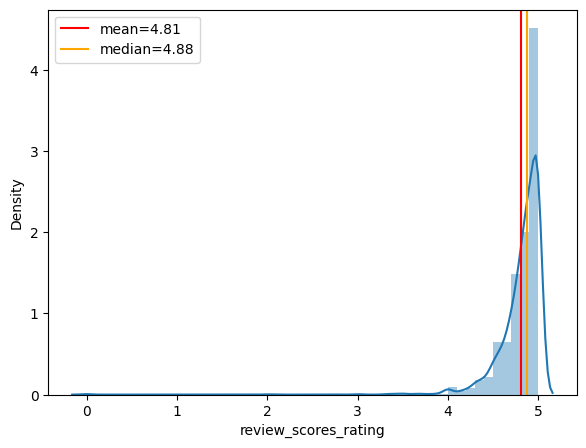

In [114]:
ratings = dict(mean=df.review_scores_rating.mean(),
              median=df.review_scores_rating.median())

plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
ax1 = sns.distplot(df.review_scores_rating,kde_kws=dict(bw=0.2))
ax1.axvline(x=ratings["mean"],c="red",label=f"mean={round(ratings['mean'],2)}")
ax1.axvline(x=ratings["median"],c="orange",label=f"median={round(ratings['median'],2)}")
plt.legend()

<Axes: xlabel='number_of_reviews'>

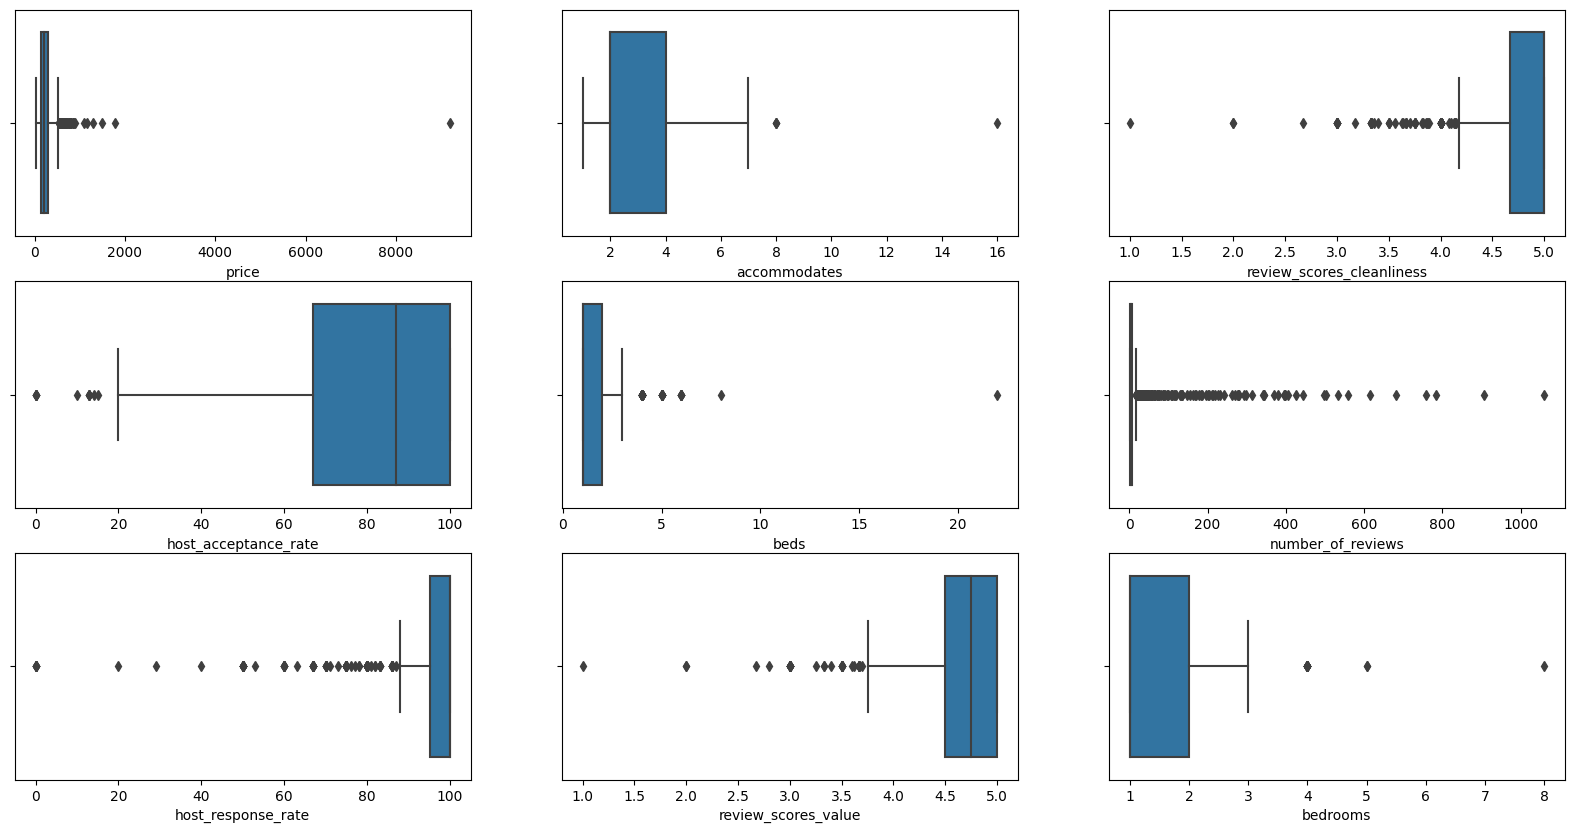

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axs = plt.subplots(3,3, figsize=(20, 10))

sns.boxplot(x=df["price"],ax=axs[0,0])
sns.boxplot(x=df["host_acceptance_rate"],ax=axs[1,0],orient='h')
sns.boxplot(x=df["host_response_rate"],ax=axs[2,0],orient='h')
sns.boxplot(x=df["accommodates"],ax=axs[0,1])
#sns.boxplot(x=df["review_scores_rating"],ax=axs[2,2])
sns.boxplot(x=df["bedrooms"],ax=axs[2,2])
sns.boxplot(x=df["beds"],ax=axs[1,1])
sns.boxplot(x=df["review_scores_value"],ax=axs[2,1])
sns.boxplot(x=df["review_scores_cleanliness"],ax=axs[0,2])
sns.boxplot(x=df["number_of_reviews"],ax=axs[1,2])

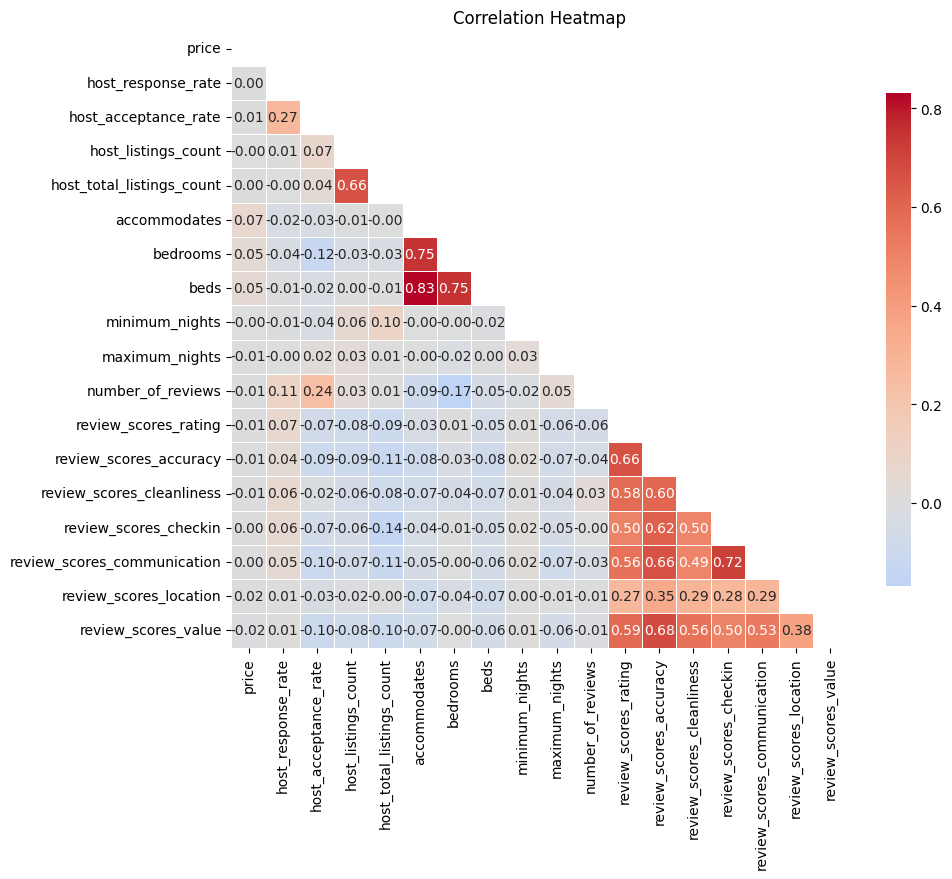

In [116]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

dr_num2 = df[['price','host_response_rate', 'host_acceptance_rate', 'host_listings_count', 'host_total_listings_count', 'accommodates', 'bedrooms', 'beds', 'minimum_nights', 'maximum_nights', 'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value']]

# Calculate the correlation matrix
correlation_matrix = dr_num2.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(10, 8))

# Create a custom colormap
#cmap = sns.diverging_palette(230, 20, s=50, l=40, as_cmap=True)
cmap = sns.color_palette("coolwarm", as_cmap=True)

# Draw the correlation heatmap
sns.heatmap(correlation_matrix, mask=mask, cmap=cmap, annot=True, fmt=".2f", center=0, square=True,
            linewidths=0.5, cbar_kws={"shrink": 0.8})
# Set plot title
plt.title('Correlation Heatmap')

# Show the plot
plt.show()


In [117]:
df_numeric = df.select_dtypes(include=['int', 'float'])
df_numeric.corr()

,id,host_id,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,latitude,longitude,...,property_type_freq,property_type_categ,host_response_time_categ,room_type_categ,neighbourhood_cleansed_freq,neighbourhood_group_categ,name_sentiment,description_sentiment,neighborhood_overview_sentiment,host_about_sentiment
id,1.000000,0.050757,-0.014075,-0.020489,-0.028519,-0.005868,-0.006068,-0.010457,0.003063,0.008935,...,-0.052557,-0.018416,0.016759,NaN,0.013167,0.001039,0.007274,-0.049874,-0.048794,-0.039244
host_id,0.050757,1.000000,-0.042645,0.195271,-0.011587,0.060176,-0.009524,-0.172882,0.000912,-0.034085,...,-0.219190,0.286526,-0.018470,NaN,0.006669,0.017379,-0.119182,-0.083386,-0.084605,-0.210537
host_response_rate,-0.014075,-0.042645,1.000000,0.273474,0.154038,0.014225,-0.001292,0.023795,0.025644,0.011540,...,-0.046769,0.025014,-0.395772,NaN,0.010149,-0.008142,-0.006014,0.011135,0.040720,0.055530
host_acceptance_rate,-0.020489,0.195271,0.273474,1.000000,0.268050,0.074354,0.044971,-0.027104,0.050074,0.019760,...,-0.212699,0.200386,-0.249360,NaN,0.034255,-0.013017,-0.074899,0.015062,0.047432,0.051836
host_is_superhost,-0.028519,-0.011587,0.154038,0.268050,1.000000,0.012601,-0.004354,0.042096,0.037472,0.047846,...,-0.219576,0.121565,-0.008516,NaN,0.017353,0.000476,-0.043616,0.001932,0.065621,0.127411
host_listings_count,-0.005868,0.060176,0.014225,0.074354,0.012601,1.000000,0.659979,-0.006339,0.017001,-0.017544,...,-0.056170,0.079499,-0.000982,NaN,0.031166,-0.023874,-0.013916,0.017455,0.001292,0.060133
host_total_listings_count,-0.006068,-0.009524,-0.001292,0.044971,-0.004354,0.659979,1.000000,-0.013064,0.005187,-0.013552,...,-0.013450,0.044152,-0.005609,NaN,0.046963,-0.040311,-0.008138,0.029994,0.024295,0.082329
host_verifications,-0.010457,-0.172882,0.023795,-0.027104,0.042096,-0.006339,-0.013064,1.000000,-0.002620,0.010188,...,0.055209,-0.039911,0.001812,NaN,-0.010852,0.004245,-0.011030,0.005181,0.057701,0.117764
latitude,0.003063,0.000912,0.025644,0.050074,0.037472,0.017001,0.005187,-0.002620,1.000000,-0.089738,...,-0.099194,0.056547,-0.019754,NaN,0.045442,-0.084636,-0.023366,-0.018114,0.035693,0.042190
longitude,0.008935,-0.034085,0.011540,0.019760,0.047846,-0.017544,-0.013552,0.010188,-0.089738,1.000000,...,-0.118691,0.028012,-0.003920,NaN,-0.289896,0.229316,-0.013421,-0.007650,0.037716,0.008976


### Salida

In [118]:
df_num = df.select_dtypes(include=['float64', 'int64'])
print(df_num.columns)

Index(['id', 'host_id', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'latitude', 'longitude', 'accommodates',
       'bedrooms', 'beds', 'amenities', 'price', 'minimum_nights',
       'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights',
       'minimum_maximum_nights', 'maximum_maximum_nights',
       'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'number_of_reviews', 'number_of_reviews_ltm',
       'number_of_reviews_l30d', 'first_review', 'last_review',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable',
       'calculated_host_listings_count',
       'calculated_host_

In [ ]:
df_val2 = df
df_val2.to_csv('df_val_3_6.csv',index=False)

# Modelos

### Importación de bases

In [ ]:
import pandas as pd
#Cargar datos
df_test = pd.read_csv('df_val_3_6.csv')
print(df_test.head())

In [ ]:
import pandas as pd
#Cargar datos
df = pd.read_csv('df_base_3_6.csv')
print(df.head())

### Modelo

In [ ]:
!pip install catboost
!pip install scikit-learn
!pip install ipywidgets
!jupyter nbextension enable --py widgetsnbextension

In [ ]:
df_num = df.select_dtypes(include=['float64', 'int64'])
print(df_num.dtypes)

In [ ]:
from sklearn.model_selection import train_test_split
X = df_num.drop(['review_scores_rating'], axis=1)
y = df_num['review_scores_rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

In [ ]:
from sklearn.metrics import explained_variance_score,mean_absolute_error,r2_score

#Creación de Modelos
lr = LinearRegression()
dt = DecisionTreeRegressor()
et = ExtraTreesRegressor()
rf = RandomForestRegressor()
cb = CatBoostRegressor()
lgbm = LGBMRegressor()
xgb = xgb.XGBRegressor()

models = [lr, dt, et, rf, cb, lgbm,xgb]

for model in models:
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test,)
  print(model)
  print("\tMean absolute error:", mean_absolute_error(y_test, y_pred))
  print("\tR2 score:", r2_score(y_test, y_pred))
  print()

Scores

LinearRegression()

	R2 score: 0.11282405038143462

DecisionTreeRegressor()

	R2 score: 0.5553895977002146

ExtraTreesRegressor()

	R2 score: 0.7405567875489546

RandomForestRegressor()

	R2 score: 0.7667523022716982

CatBoostRegressor()

	R2 score: 0.7207027498598573

LGBMRegressor()

	R2 score: 0.7051602485633837

XGBRegressor()

	R2 score: 0.6469965592340636


###Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
X = df_num.drop(['review_scores_rating'], axis=1)
y = df_num['review_scores_rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

n_estimators = 200  
max_depth = 10 
min_samples_split = 2  
min_samples_leaf = 2  

# Crear el modelo de Random Forest con los hiperparámetros definidos
model = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth,
                              min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf,
                              random_state=42)
# Entrenar el modelo
model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular el error cuadrático medio (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
print(model.score(X_test, y_test))


RandomForestRegressor()

	R2 score: 0.7780176415924406


###Extra tree

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

X = df_num.drop(['review_scores_rating'], axis=1)
y = df_num['review_scores_rating']

# Dividir los datos en conjunto de entrenamiento y conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = ExtraTreesRegressor(
    n_estimators=100,
    max_depth=10,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42
)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

ExtraTreesRegressor()

	R2 score: 0.7349010409952763


###Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

X = df_num.drop(['review_scores_rating'], axis=1)
y = df_num['review_scores_rating']

model = LinearRegression()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)


LinearRegression()

	R2 score: 0.11282405038143462

###XGB

In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

X = df_num.drop(['review_scores_rating'], axis=1)
y = df_num['review_scores_rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

params = {
    'learning_rate': 0.1,
    'max_depth': 5,
    'min_child_weight': 3,
    'subsample': 0.9,
    'colsample_bytree': 0.8,
    'n_estimators': 100
}

model = xgb.XGBRegressor(**params)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)


XGBRegressor()

	R2 score: 0.7840132645953208

###CatBoost

No modelo ganador

In [ ]:
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

param_grid = {
    'learning_rate': 0.1,
    'depth': 4,
    'l2_leaf_reg':5,
    'iterations': 200,
    'border_count': 64

}

X = df_num.drop(['review_scores_rating'], axis=1)
y = df_num['review_scores_rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

clf = CatBoostRegressor(**param_grid)
#clf.fit(X, y)

clf.fit(X_train, y_train)


y_pred = clf.predict(X_test)

print('Coefficient of determination: %.2f' % r2_score(y_test, y_pred))
print(clf.score(X_test, y_test))


CatBoostRegressor()

	R2 score: 0.765190801455466

###LGBM

In [ ]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

X = df_num.drop(['review_scores_rating'], axis=1)
y = df_num['review_scores_rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

params = {
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': 'r2',
    'num_leaves': 50,
    'learning_rate': 0.1,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0
}

model = lgb.LGBMRegressor(**params)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)

print("R2 score: ", r2)


lgb.LGBMRegressor()

	R2 score: 0.736682797091099

# Modelo ganador
CatBoost con un score = 0.8827513584924509


In [ ]:
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

X = df_num.drop(['review_scores_rating'], axis=1)
y = df_num['review_scores_rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

param_grid = {
    'learning_rate': 0.1,
    'depth': 4,
    'l2_leaf_reg':5,
    'iterations': 200,
    'border_count': 64
}

clf = CatBoostRegressor(**param_grid)

# Perform cross-validation
scores = cross_val_score(clf, X, y, cv=5, scoring='r2')

# Print cross-validation scores
print('Cross-Validation Scores:', scores)
print('Mean R2 Score:', np.mean(scores))

# Fit the model on the full dataset
clf.fit(X, y)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model performance
print('Coefficient of determination: %.2f' % r2_score(y_test, y_pred))
print(clf.score(X_test, y_test))

CatBoostRegressor()

	R2 score: 0.8827513584924509



[Notebook modelo ganador](https://colab.research.google.com/drive/10yxCZ1jdkNawKoKLpm2YwQnJUTxTUgQr?authuser=1#scrollTo=1C3pKmS1_wJZ)